In [3]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

In [10]:
def rename_keys_by_map(d, key_map):
    """
    Renames keys in a dictionary using a mapping from old to new keys.

    Args:
        d (dict): Original dictionary.
        key_map (dict): Mapping from old keys to new keys.

    Returns:
        dict: Dictionary with renamed keys.
    """
    return {key_map.get(k, k): v for k, v in d.items()}

In [4]:
data_path = '/data/willett_data/paper_results/'

In [14]:
with open(data_path + 'blue_bar_comp.pkl', 'rb') as f:
    main_results = pickle.load(f)
    
with open(data_path + 'blue_bar_val.pkl', 'rb') as f:
    main_results_val = pickle.load(f)

In [18]:
main_results.keys()
remapped_keys = {'neurips_gru_baseline_seed_seed_': 'GRU', 
                 'neurips_gru_datalog_lr_scheduler_seed_': 'GRU + LR + Log', 
                 'neurips_gru_data_log_time_masked_lr_schedule_seed_': 'GRU + LR + Log + Mask',
                 'neurips_transformer_time_masked_seed_': 'Transf. + LR + Log + Mask'}
model_perf_dict_main = rename_keys_by_map(main_results, remapped_keys)

for key, val in model_perf_dict_main.items():
    print(key, len(val))

GRU 9
GRU + LR + Log 10
GRU + LR + Log + Mask 9
Transf. + LR + Log + Mask 10


# Figure 1

/tmp/ipykernel_1179525/1851146503.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_main = data_main.groupby("Model")["Performance"].mean().reset_index()
/tmp/ipykernel_1179525/1851146503.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_ablate = data_ablate.groupby("Model")["Performance"].mean().reset_index()
/tmp/ipykernel_1179525/1851146503.py:64: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_1179525/1851146503.py:109: FutureWarning: 

Setting a gradien

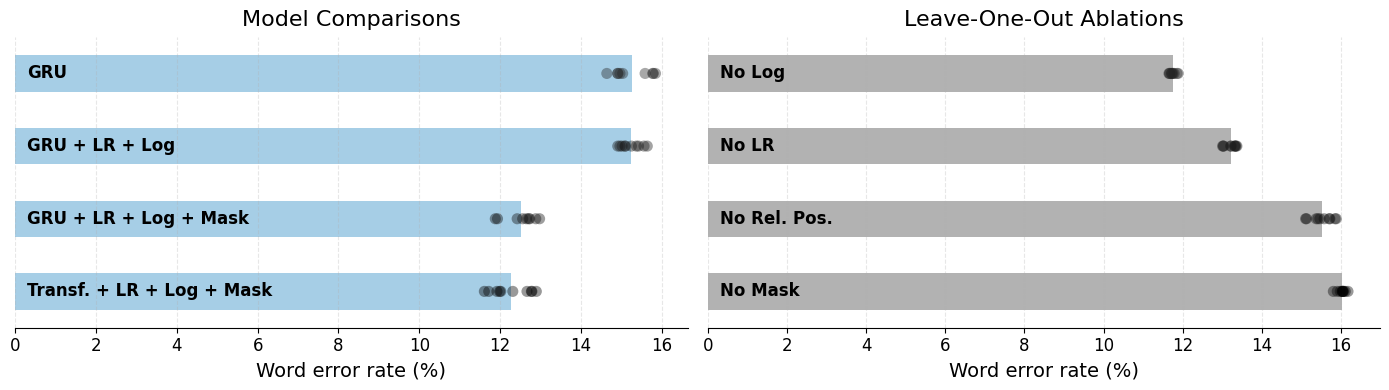

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(0)

# -----------------------------
# Data for main models
# -----------------------------
model_order_main = list(model_perf_dict_main.keys())

data_main = pd.DataFrame([
    {"Model": m, "Performance": p} for m, ps in model_perf_dict_main.items() for p in ps
])
data_main["Model"] = pd.Categorical(data_main["Model"], categories=model_order_main, ordered=True)
means_main = data_main.groupby("Model")["Performance"].mean().reset_index()

# -----------------------------
# Data for ablations
# -----------------------------
model_perf_dict_ablate = {
    "No Log": np.random.uniform(11.5, 11.9, size=10),
    "No LR": np.random.uniform(13.0, 13.4, size=10),
    "No Rel. Pos.": np.random.uniform(15, 15.9, size=10),
    "No Mask": np.random.uniform(15.8, 16.2, size=10),
}
model_order_ablate = list(model_perf_dict_ablate.keys())

data_ablate = pd.DataFrame([
    {"Model": m, "Performance": p} for m, ps in model_perf_dict_ablate.items() for p in ps
])
data_ablate["Model"] = pd.Categorical(data_ablate["Model"], categories=model_order_ablate, ordered=True)
means_ablate = data_ablate.groupby("Model")["Performance"].mean().reset_index()

# -----------------------------
# Plotting
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=False, sharey=False)
bar_color = "#6baed6"

# ---- Main models plot ----
for _, row in means_main.iterrows():
    axes[0].barh(
        y=row["Model"],
        width=row["Performance"],
        color=bar_color,
        alpha=0.6,
        height=0.5,
        zorder=0,
    )
    axes[0].text(
        0.3,
        row["Model"],
        row["Model"],
        va='center',
        ha='left',
        fontsize=12,
        color='black',
        weight='bold',
        zorder=3,
    )

sns.stripplot(
    data=data_main,
    y="Model",
    x="Performance",
    order=model_order_main,
    hue="Model",
    color='black',
    jitter=False,
    size=8,
    alpha=0.4,
    legend=False,
    zorder=2,
    ax=axes[0],
)

axes[0].set_title("Model Comparisons", fontsize=16, pad=8)
axes[0].set_xlabel("Word error rate (%)", fontsize=14)
axes[0].set_ylabel("")
axes[0].tick_params(labelsize=12)
axes[0].set_xlim(left=0)
axes[0].grid(axis="x", linestyle="--", alpha=0.3)
sns.despine(left=True, ax=axes[0])

# ---- Ablation plot ----
for _, row in means_ablate.iterrows():
    axes[1].barh(
        y=row["Model"],
        width=row["Performance"],
        color='gray',
        alpha=0.6,
        height=0.5,
        zorder=0,
    )
    axes[1].text(
        0.3,
        row["Model"],
        row["Model"],
        va='center',
        ha='left',
        fontsize=12,
        color='black',
        weight='bold',
        zorder=3,
    )

sns.stripplot(
    data=data_ablate,
    y="Model",
    x="Performance",
    order=model_order_ablate,
    hue="Model",
    color='black',
    jitter=False,
    size=8,
    alpha=0.4,
    legend=False,
    zorder=2,
    ax=axes[1],
)

axes[1].set_title("Leave-One-Out Ablations", fontsize=16, pad=8)
axes[1].set_xlabel("Word error rate (%)", fontsize=14)
axes[1].set_ylabel("")
axes[1].tick_params(labelsize=12)
axes[1].set_xlim(left=0)
axes[0].set_yticks([])
axes[1].set_yticks([])
axes[1].grid(axis="x", linestyle="--", alpha=0.3)
sns.despine(left=True, ax=axes[1])
plt.savefig('figure_pdf/figure1/3_gram.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()


# Figure 2

In [93]:
def plot_model_perf_with_benchmark(
        fig,               # existing matplotlib.figure.Figure
        axes,              # array‑like of Axes returned by plt.subplots
        idx,               # which subplot in `axes` to use
        data_dict,         # {"Model name": [seed‑level WERs], ...}
        transf_orig_perf,  # dashed‑line benchmark for Transformer
        gru_orig_perf,     # dashed‑line benchmark for GRU
        title,             # subplot title
        show_legend=True,  # whether to draw the custom legend
):
    """
    Draws a bar‑plus‑strip plot on the `idx`‑th Axes inside `fig`.

    Example usage
    -------------
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    plot_model_perf_with_benchmark(fig, axs, 0, data_dict, 11.8, 15.4,
                                   "Seed‑level WER", show_legend=False)
    """
    # ---------------  tidy data  ---------------
    df = (
        pd.DataFrame(
            [{"Model": m, "Error Rate": v}
             for m, vals in data_dict.items()
             for v in vals]
        )
    )

    palette = {
        "Transformer": "#4f81bd",  # lighter blue
        "GRU":         "#b266b2",  # lighter purple
    }

    ax = axes[idx]                             # subplot to draw on
    ax.clear()                                 # in case it already has content

    # ---------------  bar plot (means) ---------------
    sns.barplot(
        data=df, x="Model", y="Error Rate",
        estimator="mean", ci=None, palette=palette,
        width=0.5, ax=ax, zorder=0          # draw underneath strip points
    )

    # ---------------  strip plot (individual seeds) ---------------
    sns.stripplot(
        data=df, x="Model", y="Error Rate",
        jitter=True, dodge=False,
        linewidth=1, edgecolor="none",
        color="black", size=6,
        ax=ax, zorder=1
    )

    # ---------------  dashed benchmark lines ---------------
    bar_positions = [p.get_x() + p.get_width() / 2 for p in ax.patches]
    bar_width     = ax.patches[0].get_width()

    ax.hlines(
        y=transf_orig_perf,
        xmin=bar_positions[0] - bar_width / 2,
        xmax=bar_positions[0] + bar_width / 2,
        color="black", linestyle="--", linewidth=1.2
    )
    ax.hlines(
        y=gru_orig_perf,
        xmin=bar_positions[1] - bar_width / 2,
        xmax=bar_positions[1] + bar_width / 2,
        color="black", linestyle="--", linewidth=1.2
    )

    # ---------------  legend & formatting ---------------
    if show_legend:
        legend_handles = [
            Patch(color=palette["Transformer"], label="Masked Transf."),
            Patch(color=palette["GRU"],         label="GRU"),
        ]
        ax.legend(handles=legend_handles, fontsize=10, frameon=False)
    else:
        ax.get_legend_handles_labels()  # noop to avoid altering global legend

    ax.set_title(title, fontsize=12)
    ax.set_ylabel("Word Error Rate (%)", fontsize=11)
    ax.set_xlabel("")
    ax.set_xticks([])
    ax.set_xticklabels([])

    sns.despine(ax=ax)
    fig.tight_layout()
    plt.savefig('figure_pdf/figure2/robustness.pdf', bbox_inches='tight')

/tmp/ipykernel_1046475/2652791395.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_1046475/2652791395.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1046475/2652791395.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_1046475/2652791395.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1046475/2652791395.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_1046475/2652791395.py:38: FutureWarning: 

Passing `palette`

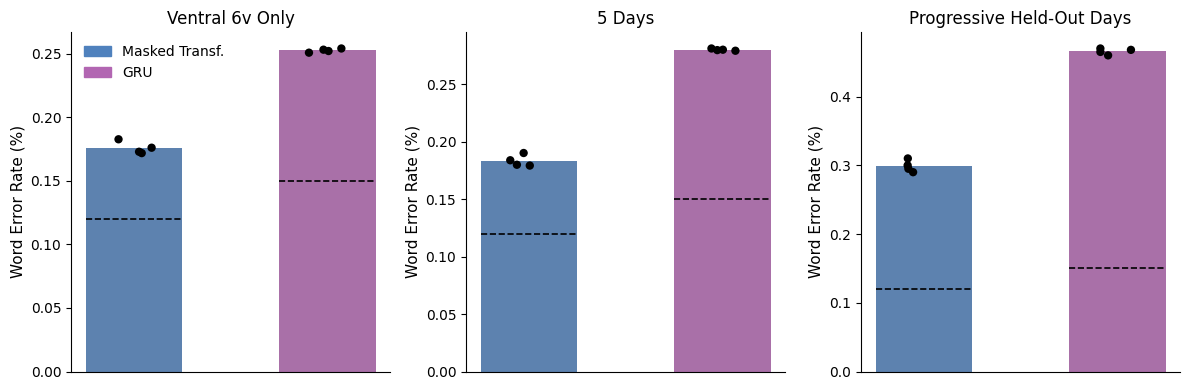

In [94]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

ventral_6v_perf = {
    'Transformer': [0.17193, 0.173, 0.17618, 0.18282],
    'GRU': [0.2543, 0.251, 0.2523, 0.25335]
}
plot_model_perf_with_benchmark(fig, axs, 0, ventral_6v_perf, 
                               transf_orig_perf=0.12, gru_orig_perf=0.15, title='Ventral 6v Only')

restricted_days = {
    'Transformer': [0.17929, 0.19023, 0.18, 0.18392],
    'GRU': [0.28016, 0.27927, 0.27981, 0.28123]
}
plot_model_perf_with_benchmark(fig, axs, 1, restricted_days, 
                               transf_orig_perf=0.12, gru_orig_perf=0.15, title='5 Days', show_legend=False)

restricted_days = {
    'Transformer': [0.30, 0.31, 0.29, 0.295],
    'GRU': [0.46, 0.465, 0.47, 0.468]
}
plot_model_perf_with_benchmark(fig, axs, 2, restricted_days, transf_orig_perf=0.12,
                               gru_orig_perf=0.15, title='Progressive Held-Out Days', show_legend=False)

In [89]:
(0.18 + 0.28 + 0.46) / 3

0.3066666666666667

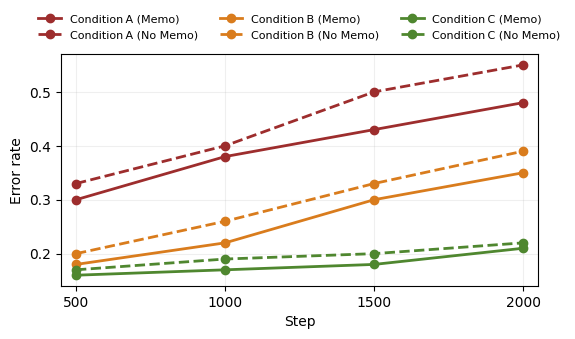

In [98]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# Example data  -----------------------------------------------------
# Replace these lists with your real numbers
steps = [500, 1000, 1500, 2000]                # x–axis

memo_perf = {                                  # solid (lower) lines
    "Condition A": [0.30, 0.38, 0.43, 0.48],
    "Condition B": [0.18, 0.22, 0.30, 0.35],
    "Condition C": [0.16, 0.17, 0.18, 0.21],
}

no_memo_perf = {                               # dashed (upper) lines
    "Condition A": [0.33, 0.40, 0.50, 0.55],
    "Condition B": [0.20, 0.26, 0.33, 0.39],
    "Condition C": [0.17, 0.19, 0.20, 0.22],
}

# Consistent colours for each condition
palette = {
    "Condition A": "#9d2d2d",   # red‑ish
    "Condition B": "#d97c1d",   # orange
    "Condition C": "#4f872f",   # green
}
# ------------------------------------------------------------------


fig, ax = plt.subplots(figsize=(6, 3.5))

for cond, col in palette.items():
    # solid – Memo (lower)
    ax.plot(
        steps, memo_perf[cond],
        label=f"{cond} (Memo)",
        color=col, linestyle="-", marker="o", linewidth=2,
    )
    # dashed – No‑Memo (upper)
    ax.plot(
        steps, no_memo_perf[cond],
        label=f"{cond} (No Memo)",
        color=col, linestyle="--", marker="o", linewidth=2,
    )

# Cosmetics ---------------------------------------------------------
ax.set_xlabel("Step")
ax.set_ylabel("Error rate")
ax.set_xticks(steps)
ax.set_xlim(min(steps) - 50, max(steps) + 50)
ax.grid(alpha=0.2)

# Put legend above the plot, shrink font a bit
ax.legend(ncol=3, fontsize=8, loc="lower center",
          bbox_to_anchor=(0.5, 1.02), frameon=False)

plt.tight_layout()
plt.show()
